In [18]:
'''Train a simple deep CNN on the CIFAR10 small images dataset.
It gets to 75% validation accuracy in 25 epochs, and 79% after 50 epochs.
(it's still underfitting at that point, though).
'''
from __future__ import print_function
import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import os
import matplotlib.pyplot as plt

In [5]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
num_classes = 10
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [11]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    zca_epsilon=1e-06,  # epsilon for ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    # randomly shift images horizontally (fraction of total width)
    width_shift_range=0.1,
    # randomly shift images vertically (fraction of total height)
    height_shift_range=0.1,
    shear_range=0.,  # set range for random shear
    zoom_range=0.,  # set range for random zoom
    channel_shift_range=0.,  # set range for random channel shifts
    # set mode for filling points outside the input boundaries
    fill_mode='nearest',
    cval=0.,  # value used for fill_mode = "constant"
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,  # randomly flip images
    # set rescaling factor (applied before any other transformation)
    rescale=None,
    # set function that will be applied on each input
    preprocessing_function=None,
    # image data format, either "channels_first" or "channels_last"
    data_format=None,
    # fraction of images reserved for validation (strictly between 0 and 1)
    validation_split=0.0)

# Compute quantities required for feature-wise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(x_train)


In [27]:
batch_size = 64
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'


model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

opt = Adam(lr=3e-3)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_30 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_31 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 32)       

In [28]:
epochs = 15

history= model.fit(datagen.flow(x_train, y_train,
                    batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test))

Epoch 1/15
782/782 [==============================] - 24s 29ms/step - loss: 2.1468 - accuracy: 0.3216 - val_loss: 1.8531 - val_accuracy: 0.4446
Epoch 2/15
782/782 [==============================] - 23s 30ms/step - loss: 1.3757 - accuracy: 0.5102 - val_loss: 1.0440 - val_accuracy: 0.6268
Epoch 3/15
782/782 [==============================] - 23s 29ms/step - loss: 1.1648 - accuracy: 0.5877 - val_loss: 1.0123 - val_accuracy: 0.6500
Epoch 4/15
782/782 [==============================] - 23s 29ms/step - loss: 1.0450 - accuracy: 0.6359 - val_loss: 0.9828 - val_accuracy: 0.6646
Epoch 5/15
782/782 [==============================] - 23s 29ms/step - loss: 0.9624 - accuracy: 0.6637 - val_loss: 0.8350 - val_accuracy: 0.7063
Epoch 6/15
782/782 [==============================] - 23s 29ms/step - loss: 0.9153 - accuracy: 0.6821 - val_loss: 0.8027 - val_accuracy: 0.7231
Epoch 7/15
782/782 [==============================] - 23s 29ms/step - loss: 0.8920 - accuracy: 0.6929 - val_loss: 0.8273 - val_accuracy:

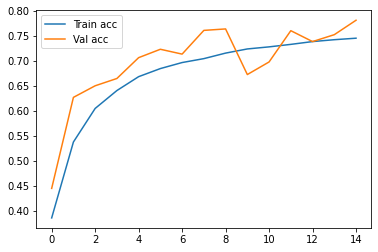

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train acc','Val acc'])
plt.show()

In [30]:
opt = Adam(lr=1e-4)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

epochs = 15

history2= model.fit(datagen.flow(x_train, y_train,
                    batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test))

Epoch 1/15
782/782 [==============================] - 24s 29ms/step - loss: 0.6746 - accuracy: 0.7675 - val_loss: 0.5891 - val_accuracy: 0.8021
Epoch 2/15
782/782 [==============================] - 23s 29ms/step - loss: 0.6368 - accuracy: 0.7767 - val_loss: 0.5744 - val_accuracy: 0.8076
Epoch 3/15
782/782 [==============================] - 23s 29ms/step - loss: 0.6220 - accuracy: 0.7874 - val_loss: 0.5642 - val_accuracy: 0.8085
Epoch 4/15
782/782 [==============================] - 23s 29ms/step - loss: 0.6262 - accuracy: 0.7830 - val_loss: 0.5555 - val_accuracy: 0.8115
Epoch 5/15
782/782 [==============================] - 23s 29ms/step - loss: 0.6007 - accuracy: 0.7930 - val_loss: 0.5524 - val_accuracy: 0.8128
Epoch 6/15
782/782 [==============================] - 23s 29ms/step - loss: 0.5918 - accuracy: 0.7960 - val_loss: 0.5539 - val_accuracy: 0.8110
Epoch 7/15
782/782 [==============================] - 23s 29ms/step - loss: 0.6008 - accuracy: 0.7945 - val_loss: 0.5466 - val_accuracy:

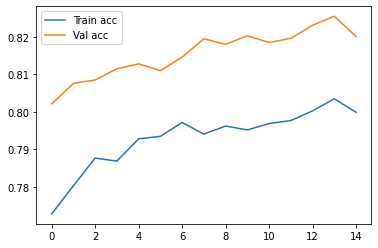

In [31]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.legend(['Train acc','Val acc'])
plt.show()

In [32]:
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/saved_models/keras_cifar10_trained_model.h5 


In [33]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.5304 - accuracy: 0.8201
Test loss: 0.5304055213928223
Test accuracy: 0.8201000094413757
